In [2]:
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from matplotlib import image as mp_image
import seaborn as sns

from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

import os
import shutil

import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from keras import layers
from keras.models import Sequential
from keras.utils import to_categorical

import keras.layers as L
import keras as K
import keras.layers as L
import os
import cv2
from keras import backend as K
%load_ext tensorboard


The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [3]:
training_folder_dir = './Linnaeus 5 128X128/train'
test_folder_dir = './Linnaeus 5 128X128/test'

img_size = (128, 128)

class_names = sorted(os.listdir(training_folder_dir))
class_names

['berry', 'bird', 'dog', 'flower', 'other']

# show one image from each set

berry
./Linnaeus 5 128X128/train\berry


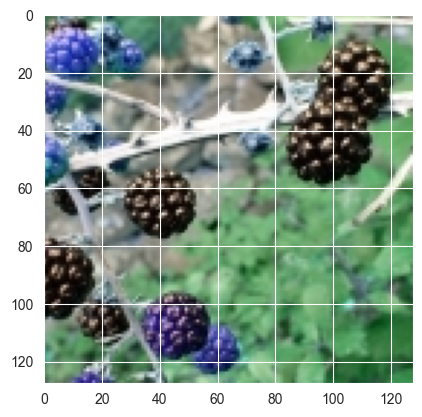

bird
./Linnaeus 5 128X128/train\bird


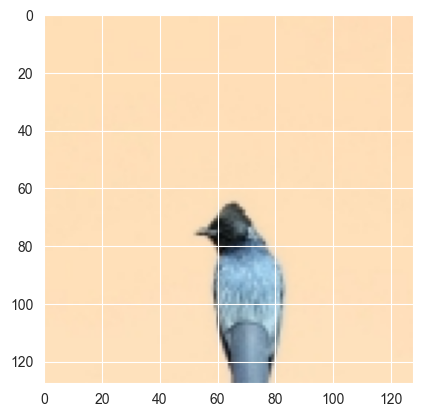

dog
./Linnaeus 5 128X128/train\dog


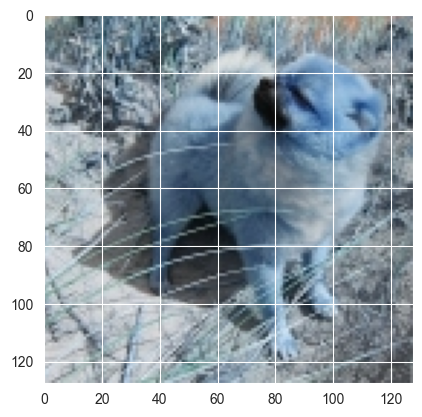

flower
./Linnaeus 5 128X128/train\flower


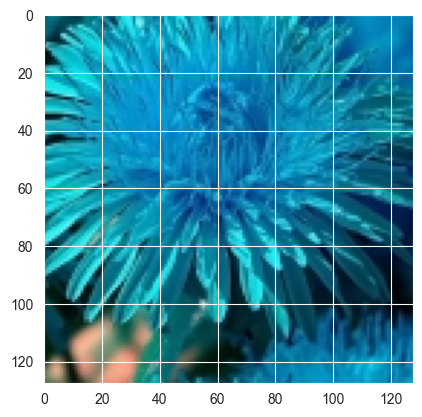

other
./Linnaeus 5 128X128/train\other


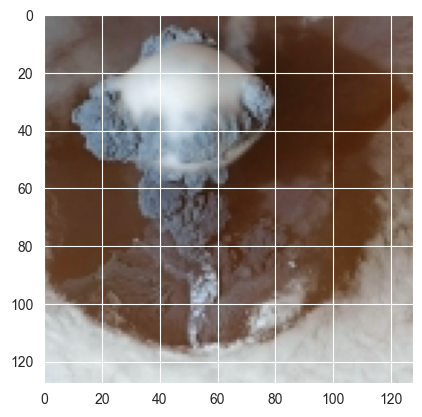

In [4]:
for category in class_names:
    print(category)
    path = os.path.join(training_folder_dir, category)
    print(path)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img))
        plt.imshow(img_array)
        plt.show()
        break

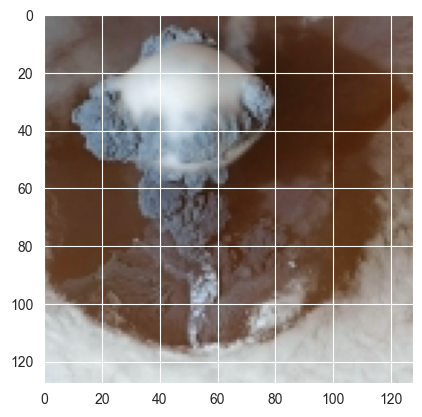

In [5]:
IMG_SIZE = 128
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array)
plt.show()

In [6]:
training_folder_dir

'./Linnaeus 5 128X128/train'

In [7]:
class_names

['berry', 'bird', 'dog', 'flower', 'other']

In [8]:
def create_dataset(data_path):
    training_data = []
    for i in range(len(class_names)):
        category = class_names[i]
        path = os.path.join(data_path, category)
        print(path)
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path, img))
            new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
            training_data.append([new_array, i])

    return training_data

In [9]:
train_data = create_dataset(training_folder_dir)
test_data = create_dataset(test_folder_dir)

./Linnaeus 5 128X128/train\berry
./Linnaeus 5 128X128/train\bird
./Linnaeus 5 128X128/train\dog
./Linnaeus 5 128X128/train\flower
./Linnaeus 5 128X128/train\other
./Linnaeus 5 128X128/test\berry
./Linnaeus 5 128X128/test\bird
./Linnaeus 5 128X128/test\dog
./Linnaeus 5 128X128/test\flower
./Linnaeus 5 128X128/test\other


In [10]:
import random

random.shuffle(train_data)
random.shuffle(test_data)

len(train_data), len(test_data)

(6000, 2000)

In [11]:
def extract_X_y(data):
    X = []
    y = []
    for features, label in data:
        X.append(features)
        y.append(label)
    X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
    X = np.array(X)
    y = np.array(y)
    return X, y

In [12]:
train_X, train_y = extract_X_y(train_data)
test_X, test_y = extract_X_y(test_data)

# Q1

# try 2 for Q1

In [13]:
num_classes = len(class_names)

model_q1_2 = Sequential([
    layers.Rescaling(1. / 255, input_shape=(128, 128, 3)),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.AvgPool2D(),
    layers.Conv2D(32, 5, padding='same', activation='relu'),
    layers.AvgPool2D(),
    layers.Conv2D(64, 7, padding='same', activation='relu'),
    layers.AvgPool2D(),
    layers.Conv2D(128, 7, padding='same', activation='relu'),
    layers.AvgPool2D(),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(num_classes)
])

In [14]:
model_q1_2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model_q1_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 128, 128, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 128, 128, 16)      448       
                                                                 
 average_pooling2d (AverageP  (None, 64, 64, 16)       0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        12832     
                                                                 
 average_pooling2d_1 (Averag  (None, 32, 32, 32)       0         
 ePooling2D)                                                     
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        1

In [15]:
import time
epochs = 13

start = time.time()
history = model_q1_2.fit(
    x=train_X,
    y=train_y,
    validation_split=0.1,
    batch_size=32,
    epochs=epochs
)
end = time.time() - start

Epoch 1/13
169/169 [==============================] - 46s 266ms/step - loss: 1.4675 - accuracy: 0.3150 - val_loss: 1.3462 - val_accuracy: 0.4033
Epoch 2/13
169/169 [==============================] - 49s 290ms/step - loss: 1.2712 - accuracy: 0.4491 - val_loss: 1.2253 - val_accuracy: 0.4933
Epoch 3/13
169/169 [==============================] - 45s 264ms/step - loss: 1.1968 - accuracy: 0.4898 - val_loss: 1.1287 - val_accuracy: 0.5400
Epoch 4/13
169/169 [==============================] - 44s 263ms/step - loss: 1.0975 - accuracy: 0.5378 - val_loss: 1.0229 - val_accuracy: 0.5983
Epoch 5/13
169/169 [==============================] - 47s 281ms/step - loss: 1.0344 - accuracy: 0.5698 - val_loss: 1.0121 - val_accuracy: 0.5667
Epoch 6/13
169/169 [==============================] - 42s 249ms/step - loss: 0.9613 - accuracy: 0.6033 - val_loss: 0.9244 - val_accuracy: 0.6417
Epoch 7/13
169/169 [==============================] - 42s 249ms/step - loss: 0.8905 - accuracy: 0.6448 - val_loss: 0.9861 - val_ac

In [16]:
print("Total time: ", end, "seconds")


Total time:  568.7216644287109 seconds


# Q6

load data

daisy
./flower_photos\daisy


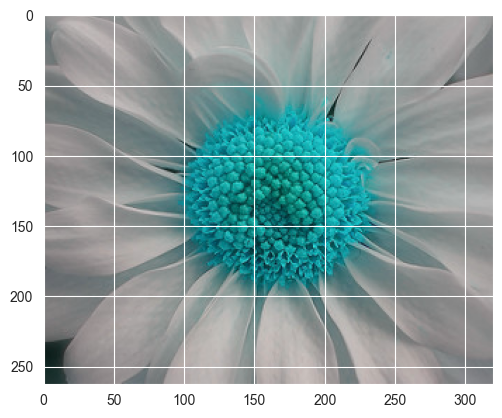

dandelion
./flower_photos\dandelion


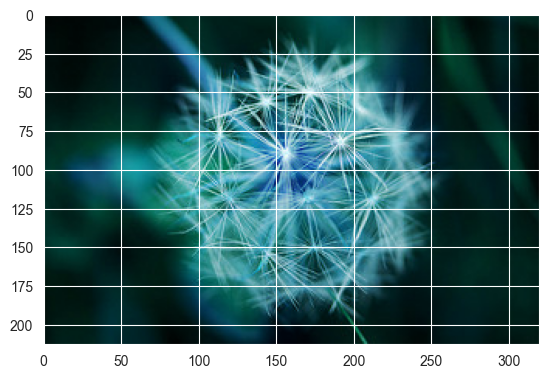

roses
./flower_photos\roses


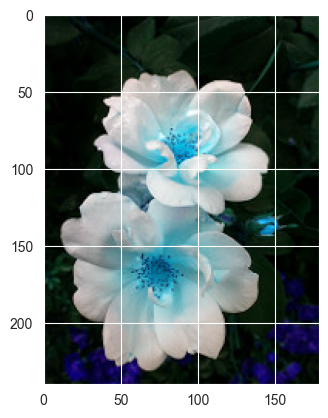

sunflowers
./flower_photos\sunflowers


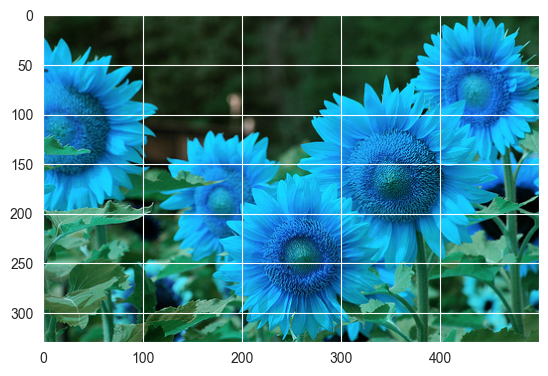

tulips
./flower_photos\tulips


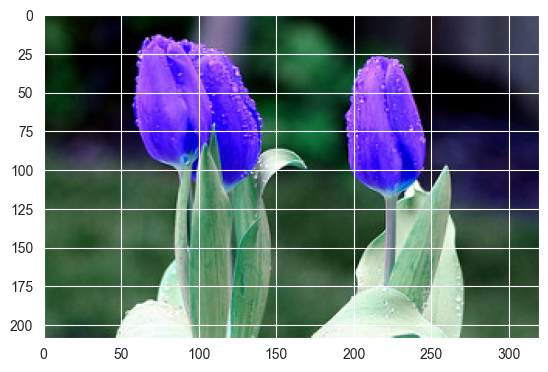

In [51]:
flower_dir = './flower_photos'

class_names = sorted(os.listdir(flower_dir))
class_names

for category in class_names:
    print(category)
    path = os.path.join(flower_dir, category)
    print(path)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img))
        plt.imshow(img_array)
        plt.show()
        break

In [52]:
flower_data = create_dataset(flower_dir)
flower_X, flower_y = extract_X_y(flower_data)
flower_train_X, flower_test_X, flower_train_y, flower_test_y = train_test_split(flower_X, flower_y, test_size=0.2,shuffle=True)
flower_train_X.shape, flower_test_X.shape, flower_train_y.shape, flower_test_y.shape


./flower_photos\daisy
./flower_photos\dandelion
./flower_photos\roses
./flower_photos\sunflowers
./flower_photos\tulips


((2936, 128, 128, 3), (734, 128, 128, 3), (2936,), (734,))

In [53]:
clone_model= keras.models.clone_model(model_q1_2)
clone_model.build((None, 128,128,3)) # replace 10 with number of variables in input layer
clone_model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"] )
clone_model.set_weights(model_q1_2.get_weights())

In [54]:
for layer in clone_model.layers:
    layer.trainable = False
base_layers = clone_model.layers[-2].output
new_outputs = L.Dense(5, activation = "softmax")(base_layers)
flower_model = keras.Model(inputs = clone_model.input, outputs = new_outputs)
flower_model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_input (InputLayer  [(None, 128, 128, 3)]    0         
 )                                                               
                                                                 
 rescaling (Rescaling)       (None, 128, 128, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 128, 128, 16)      448       
                                                                 
 average_pooling2d (AverageP  (None, 64, 64, 16)       0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        12832     
                                                                 
 average_pooling2d_1 (Averag  (None, 32, 32, 32)       0   

In [55]:
flower_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [56]:
flower_train_y

array([1, 1, 3, ..., 4, 3, 0])

In [60]:
start = time.time()
history = flower_model.fit(x=flower_train_X, y=flower_train_y, batch_size=64, epochs=10, validation_split=0.1,
                              callbacks=[keras.callbacks.TensorBoard()])
duration2 = time.time() - start

Epoch 1/10
42/42 [==============================] - 12s 278ms/step - loss: 1.7070 - accuracy: 0.2721 - val_loss: 1.5137 - val_accuracy: 0.3401
Epoch 2/10
42/42 [==============================] - 12s 275ms/step - loss: 1.4904 - accuracy: 0.3740 - val_loss: 1.3979 - val_accuracy: 0.4048
Epoch 3/10
42/42 [==============================] - 12s 274ms/step - loss: 1.3872 - accuracy: 0.4394 - val_loss: 1.3259 - val_accuracy: 0.4660
Epoch 4/10
42/42 [==============================] - 11s 265ms/step - loss: 1.3244 - accuracy: 0.4743 - val_loss: 1.2895 - val_accuracy: 0.4830
Epoch 5/10
42/42 [==============================] - 12s 283ms/step - loss: 1.2779 - accuracy: 0.4902 - val_loss: 1.2611 - val_accuracy: 0.5136
Epoch 6/10
42/42 [==============================] - 12s 276ms/step - loss: 1.2457 - accuracy: 0.5011 - val_loss: 1.2393 - val_accuracy: 0.5170
Epoch 7/10
42/42 [==============================] - 12s 288ms/step - loss: 1.2218 - accuracy: 0.5250 - val_loss: 1.2148 - val_accuracy: 0.5238

In [62]:
duration2

115.64713501930237

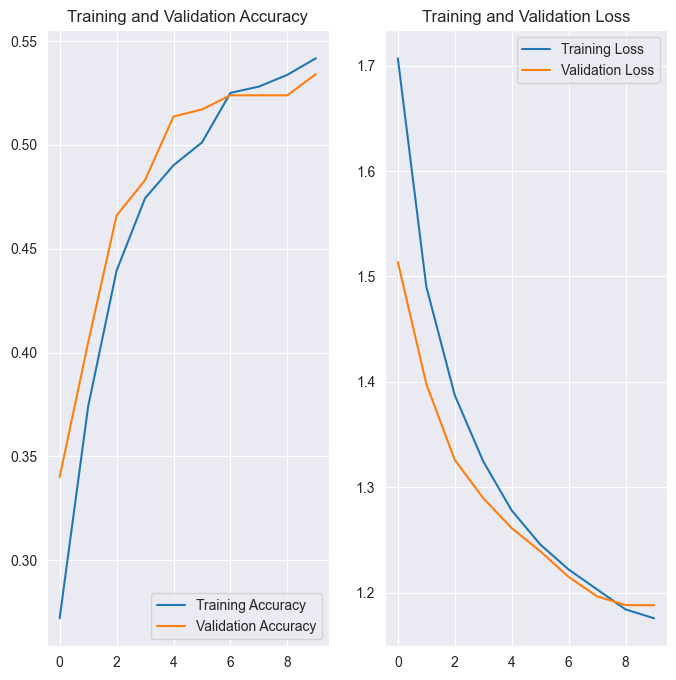

In [63]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [69]:
pred = flower_model.predict(flower_test_X)
pred = pred.argmax(axis=1)

23/23 [==============================] - 3s 126ms/step


In [70]:
accuracy_score(flower_test_y, pred)

0.49727520435967304

In [72]:
confusion_matrix(flower_test_y, pred)

array([[ 58,  36,   5,   6,  18],
       [ 20, 129,   9,  10,  12],
       [ 12,  30,  44,   9,  40],
       [  7,  42,   7,  50,  25],
       [ 14,  29,  24,  14,  84]], dtype=int64)

train all layers

In [75]:
for layer in flower_model.layers:
    layer.trainable = True

In [76]:
flower_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [78]:
start = time.time()
history = flower_model.fit(x=flower_train_X, y=flower_train_y, batch_size=64, epochs=20, validation_split=0.1,
                              callbacks=[keras.callbacks.TensorBoard()])
duration2 = time.time() - start

Epoch 1/20
42/42 [==============================] - 65s 2s/step - loss: 0.9934 - accuracy: 0.6264 - val_loss: 0.9760 - val_accuracy: 0.6293
Epoch 2/20
42/42 [==============================] - 61s 1s/step - loss: 0.7194 - accuracy: 0.7373 - val_loss: 0.9655 - val_accuracy: 0.6395
Epoch 3/20
42/42 [==============================] - 61s 1s/step - loss: 0.5223 - accuracy: 0.8134 - val_loss: 0.9319 - val_accuracy: 0.6701
Epoch 4/20
42/42 [==============================] - 61s 1s/step - loss: 0.3497 - accuracy: 0.8819 - val_loss: 0.9828 - val_accuracy: 0.6939
Epoch 5/20
42/42 [==============================] - 60s 1s/step - loss: 0.2170 - accuracy: 0.9285 - val_loss: 1.1859 - val_accuracy: 0.6735
Epoch 6/20
42/42 [==============================] - 60s 1s/step - loss: 0.1362 - accuracy: 0.9587 - val_loss: 1.2479 - val_accuracy: 0.6565
Epoch 7/20
42/42 [==============================] - 60s 1s/step - loss: 0.0874 - accuracy: 0.9746 - val_loss: 1.5407 - val_accuracy: 0.6735
Epoch 8/20
42/42 [==

In [79]:
duration2

1209.1318850517273

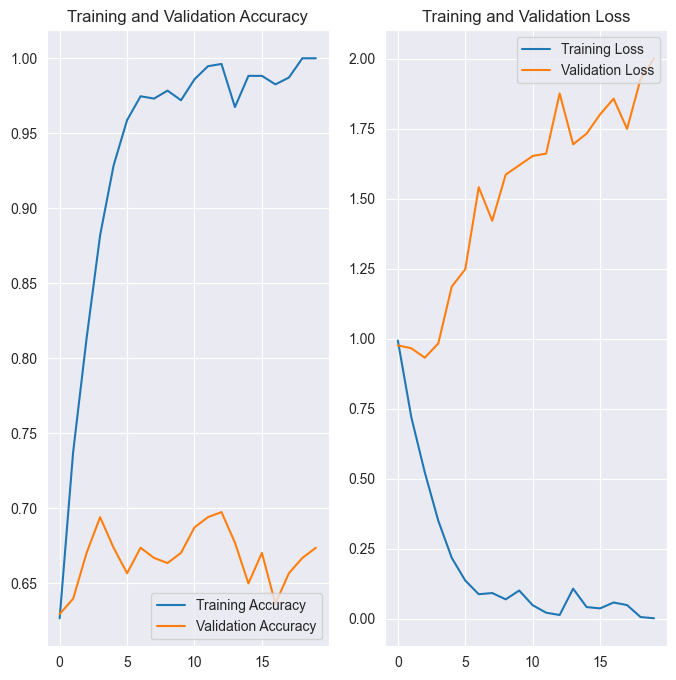

In [81]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [84]:

pred = flower_model.predict(flower_test_X)
pred = pred.argmax(axis=1)

23/23 [==============================] - 3s 117ms/step


In [85]:
accuracy_score(flower_test_y, pred)

0.6485013623978202

In [86]:
confusion_matrix(flower_test_y, pred)

array([[ 86,  18,   7,   4,   8],
       [ 13, 131,  17,  11,   8],
       [ 11,  13,  68,   5,  38],
       [  4,  15,   4,  99,   9],
       [  9,  15,  37,  12,  92]], dtype=int64)

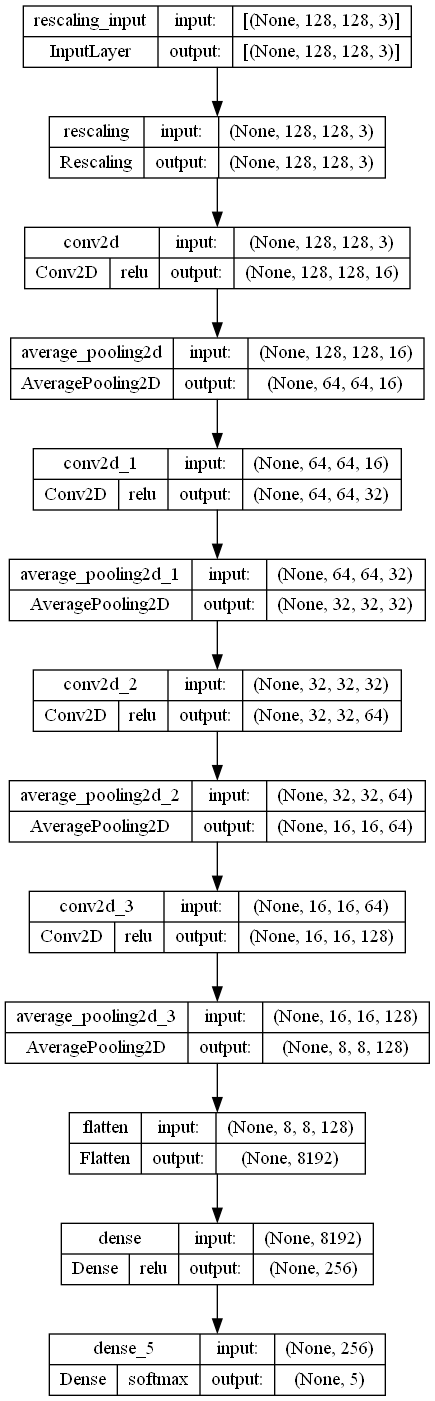

In [87]:
keras.utils.plot_model(flower_model, show_layer_activations=True, show_shapes=True, show_layer_names=True)